<a href="https://colab.research.google.com/github/NoyaLasheen/Parkinson-s-Disease-Detection/blob/main/Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
df = pd.read_csv('/content/parkinsons.data')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline


df = pd.read_csv('/content/parkinsons.data')
features = df.loc[:, df.columns != 'status'].values[:, 1:]



# get status values in array format

labels = df.loc[:, 'status'].values
df['status'].value_counts()
scaler = MinMaxScaler((-1, 1))

# fit_transform() method fits to the data and
# then transforms it.

X = scaler.fit_transform(features)
y = labels
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=42)
model = XGBClassifier()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

print("Accuracy Score is", accuracy_score(y_test, y_prediction) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_prediction))

Accuracy Score is 96.66666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.96      1.00      0.98        26

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30



Text(95.72222222222221, 0.5, 'Truth')

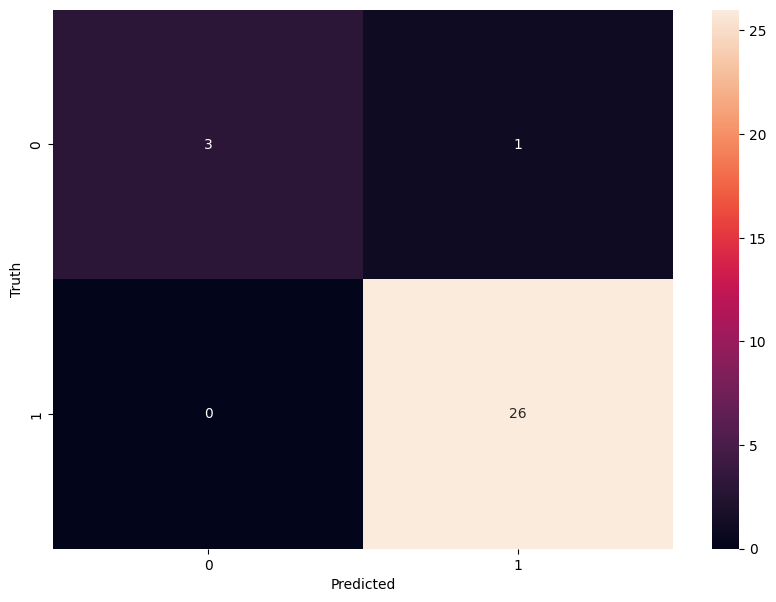

In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/parkinsons.data')

# Preparing features and labels
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

# Scale the features
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
y = labels

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_pred = (model.predict(x_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy Score:", accuracy * 100)

# Print classification report
print(classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5800 - loss: 0.6918 - val_accuracy: 0.8182 - val_loss: 0.6155
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6917 - loss: 0.6514 - val_accuracy: 0.8182 - val_loss: 0.5700
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7513 - loss: 0.6083 - val_accuracy: 0.8182 - val_loss: 0.5310
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7346 - loss: 0.5939 - val_accuracy: 0.8182 - val_loss: 0.5029
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7273 - loss: 0.5916 - val_accuracy: 0.8182 - val_loss: 0.4772
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.5328 - val_accuracy: 0.8182 - val_loss: 0.4424
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7837 - loss: 0.4986 - val_accuracy: 0.8182 - val_loss: 0.4075
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7212 - loss: 0.5073 - val_accuracy: 0.8485 - val_loss: 0.3786
Epoch 9/100

Text(95.72222222222221, 0.5, 'Truth')

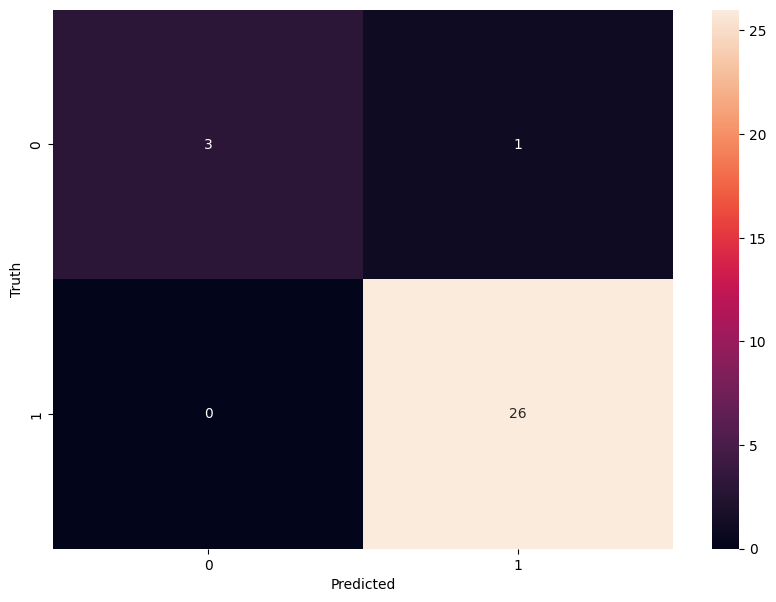

In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/parkinsons.data')


data = data.select_dtypes(include=['float64', 'int64'])


X = data.drop(columns=['status'])
y = data['status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Support Vector Machine
print("Support Vector Machine:")
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine:
SVM Accuracy: 0.9666666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.96      1.00      0.98        26

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30



Text(95.72222222222221, 0.5, 'Truth')

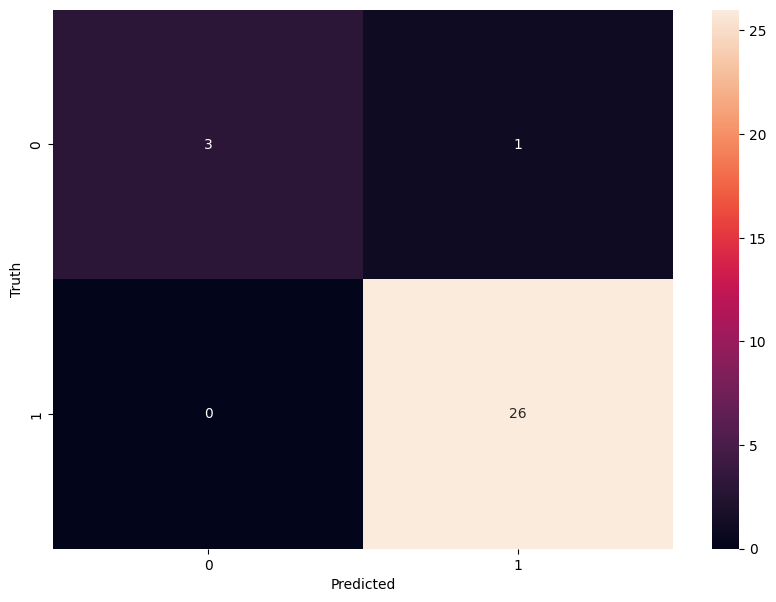

In [ ]:
cm = confusion_matrix(y_test, svm.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Random Forest Accuracy: 0.9333333333333333
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.96      0.96      0.96        26

    accuracy                           0.93        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.93      0.93      0.93        30



Text(95.72222222222221, 0.5, 'Truth')

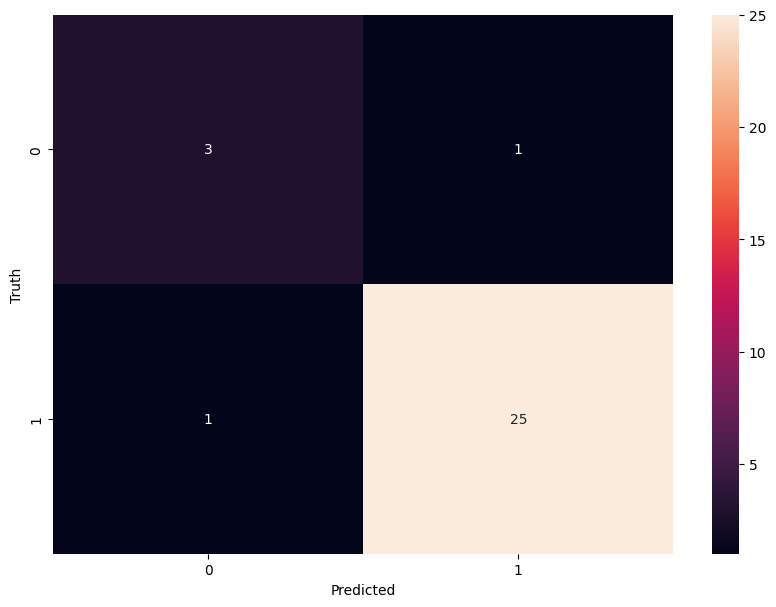

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

# Naive Bayes
print("\nNaive Bayes:")
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
Naive Bayes Accuracy: 0.7666666666666667
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.95      0.77      0.85        26

    accuracy                           0.77        30
   macro avg       0.64      0.76      0.66        30
weighted avg       0.87      0.77      0.80        30



Text(95.72222222222221, 0.5, 'Truth')

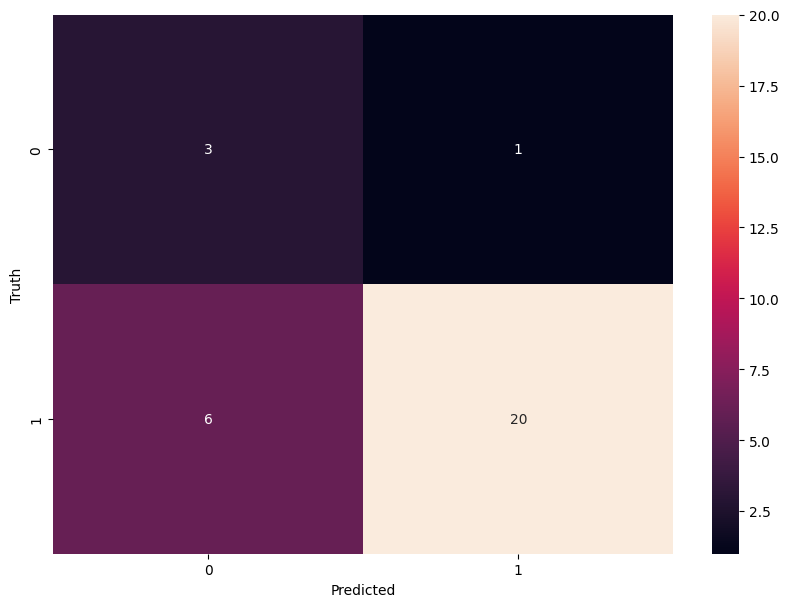

In [ ]:
cm = confusion_matrix(y_test, nb.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

# Multi-Layer Perceptron (Neural Network)
print("\nMulti-Layer Perceptron:")
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_accuracy)
print("Classification Report for MLP:\n", classification_report(y_test, y_pred_mlp))


Multi-Layer Perceptron:
MLP Accuracy: 0.9333333333333333
Classification Report for MLP:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.96      0.96      0.96        26

    accuracy                           0.93        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
